<a href="https://colab.research.google.com/github/nitikshamodi/Mining-the-bitcoin-network/blob/master/Datascience_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install python-igraph

    100% |████████████████████████████████| 378kB 31.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/41/d6/02/34eebae97e25f5b87d60f4c0687e00523e3f244fa41bc3f4a7
Successfully built python-igraph


In [0]:
# !pip install pycairo

In [0]:
import networkx as nx
import numpy as np
# import cairocffi
import igraph as ig

In [0]:
G = ig.Graph.Read_GraphML("2010_4.graphml")
ig.summary(G)

IGRAPH D-W- 3515 6618 -- 
+ attr: id (v), weight (e)


In [0]:
# largest = max(nx.strongly_connected_components(G), key=len)

In [0]:
# G.es["weight"]
# G.vs["id"]

In [0]:
G.vcount(), G.ecount()

(3515, 6618)

In [0]:
ew = list(map(float, G.es["weight"]))
dendrogram = G.community_fastgreedy(weights = ew)
# convert it into a flat clustering
clusters = dendrogram.as_clustering()
print(len(clusters))
# get the membership vector
membership = clusters.membership

In [0]:
import csv

writer = csv.writer(open("output.csv", "wb"))
for name, membership in zip(G.vs["label"], membership):
    writer.writerow([name, membership])

In [0]:
G.es["weight"]

In [0]:
for i in clusters:
  print(i)
  print(type(i))
  break

In [0]:
dendrogram.optimal_count

In [0]:
number_of_clusters = []
for year in range(2009, 2011):
    for month in range(1,13):
      if year == 2009 and month == 1:
        continue
      G = ig.Graph.Read_GraphML(str(year) + "_" + str(month) + ".graphml")
      ew = list(map(float, G.es["weight"]))
      dendrogram = G.community_fastgreedy(weights = ew)
      number_of_clusters.append(dendrogram.optimal_count)

Text(0, 0.5, 'Number of clusters')

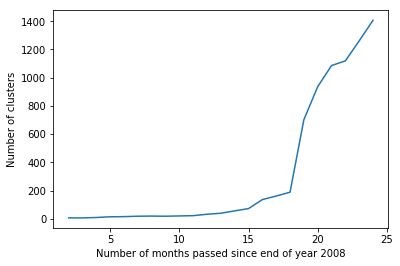

In [0]:
import matplotlib.pyplot as plt
plt.plot(range(2,25), number_of_clusters)
plt.xlabel("Number of months passed since end of year 2008")
plt.ylabel("Number of clusters")

In [0]:
G = ig.Graph.Read_GraphML("2010_12.graphml")
ig.summary(G)

IGRAPH U-W- 73553 118119 -- 
+ attr: id (v), weight (e)


In [0]:
avg_cluster_size = []
for year in range(2009, 2011):
    for month in range(1,13):
      if year == 2009 and month == 1:
        continue
      G = ig.Graph.Read_GraphML(str(year) + "_" + str(month) + ".graphml")
      ew = list(map(float, G.es["weight"]))
      dendrogram = G.community_fastgreedy(weights = ew)
      l = 0
      clusters = dendrogram.as_clustering()
      for i in clusters:
        l += len(i)
      avg_cluster_size.append(l/dendrogram.optimal_count)

In [0]:
dendrogram.optimal_count

1407

Text(0, 0.5, 'Avg cluster size')

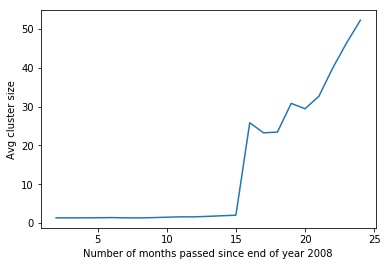

In [0]:
import matplotlib.pyplot as plt
plt.plot(range(2,25), avg_cluster_size)
plt.xlabel("Number of months passed since end of year 2008")
plt.ylabel("Avg cluster size")

In [0]:
avg_cluster_size[14]

25.845588235294116

In [0]:
G = nx.read_graphml("2010_12.graphml")
